<a href="https://colab.research.google.com/github/Raffa-Silva/Testes-treinamento-de-redes/blob/main/Teste_TCN_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste realizado com dados somente de 2021 para o treinamento, e validação em 2021 utilizando 10 dias de previsão com a rede TCN

In [ ]:
# Importações necessárias
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import chardet #biblioteca usada para detectar a codificação (encoding) de um conjunto de bytes

#Montando a partição do Google Drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/Doutorado/Dados-covid-estado.csv'
file_path2 = '/content/drive/MyDrive/Doutorado/leitos-e-internacoes.csv'

rawdata = open(file_path1, "rb").read()
result = chardet.detect(rawdata)
encoding = result['encoding']

rawdata2 = open(file_path2, "rb").read()
result2 = chardet.detect(rawdata2)
encoding2 = result2['encoding']

#Abrindo um arquivo (tabular) do tipo csv
df_covid_estado = pd.read_csv(file_path1, delimiter=";", encoding=encoding)
df_covid_hospitalizados = pd.read_csv(file_path2, delimiter=";", encoding=encoding)

print('Conjunto de dados de Covid-19 no estado de SP:')
print(df_covid_estado)

print('Conjunto de dados de hospitalizados de Covid-19 no estado de SP:')
print(df_covid_hospitalizados)


Mounted at /content/drive
Conjunto de dados de Covid-19 no estado de SP:
            Data    Casos  Casos por dia  Óbitos por dia
0     26/02/2020        1              1               0
1     27/02/2020        0              0               0
2     28/02/2020        0              0               0
3     29/02/2020        2              1               0
4     01/03/2020        0              0               0
...          ...      ...            ...             ...
1192  02/06/2023  6618980            795              22
1193  03/06/2023  6618980              0               0
1194  04/06/2023  6619871            891              11
1195  05/06/2023  6619936             65               6
1196  06/06/2023  6621112           1176              25

[1197 rows x 4 columns]
Conjunto de dados de hospitalizados de Covid-19 no estado de SP:
             Data                        nome_drs ocupacao_leitos  \
0      08/10/2020        DRS 01 Grande SÃ£o Paulo           42,17   
1      08/10/20

In [ ]:

# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)

Data              0
Casos             0
Casos por dia     0
Óbitos por dia    0
dtype: int64
Data                           0
nome_drs                       0
ocupacao_leitos               18
pacientes_uti_ultimo_dia      18
total_covid_uti_ultimo_dia    18
ocupacao_leitos_ultimo_dia    18
internacoes_ultimo_dia        18
pacientes_enf_ultimo_dia      18
total_covid_enf_ultimo_dia    18
dtype: int64


In [ ]:
# Verificar quais linhas contêm valores ausentes no DataFrame df_covid_hospitalizados
linhas_com_nan = df_covid_hospitalizados[df_covid_hospitalizados.isnull().any(axis=1)]

# Exibir as linhas com valores ausentes
print(linhas_com_nan)


             Data                        nome_drs ocupacao_leitos  \
16596  18/04/2023        DRS 01 Grande SÃ£o Paulo             NaN   
16597  18/04/2023               DRS 02 AraÃ§atuba             NaN   
16598  18/04/2023               DRS 03 Araraquara             NaN   
16599  18/04/2023         DRS 04 Baixada Santista             NaN   
16600  18/04/2023                 DRS 05 Barretos             NaN   
16601  18/04/2023                    DRS 06 Bauru             NaN   
16602  18/04/2023                 DRS 07 Campinas             NaN   
16603  18/04/2023                   DRS 08 Franca             NaN   
16604  18/04/2023                 DRS 09 MarÃ­lia             NaN   
16605  18/04/2023               DRS 10 Piracicaba             NaN   
16606  18/04/2023      DRS 11 Presidente Prudente             NaN   
16607  18/04/2023                 DRS 12 Registro             NaN   
16608  18/04/2023          DRS 13 RibeirÃ£o Preto             NaN   
16609  18/04/2023  DRS 14 SÃ£o JoÃ

In [ ]:
#preencher os valores NaN
coluna_alvo1 = 'ocupacao_leitos'
coluna_alvo2 = 'pacientes_uti_ultimo_dia'
coluna_alvo3 = 'total_covid_uti_ultimo_dia'
coluna_alvo4 = 'ocupacao_leitos_ultimo_dia'
coluna_alvo5 = 'internacoes_ultimo_dia'
coluna_alvo6 = 'pacientes_enf_ultimo_dia'
coluna_alvo7 = 'total_covid_enf_ultimo_dia'

df_covid_hospitalizados[coluna_alvo1] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo1], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo1].fillna(df_covid_hospitalizados[coluna_alvo1].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo2].fillna(df_covid_hospitalizados[coluna_alvo2].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo3].fillna(df_covid_hospitalizados[coluna_alvo3].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo4] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo4], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo4].fillna(df_covid_hospitalizados[coluna_alvo4].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo5].fillna(df_covid_hospitalizados[coluna_alvo5].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo6].fillna(df_covid_hospitalizados[coluna_alvo6].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo7].fillna(df_covid_hospitalizados[coluna_alvo7].mean(), inplace=True)


In [ ]:
# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)


Data              0
Casos             0
Casos por dia     0
Óbitos por dia    0
dtype: int64
Data                          0
nome_drs                      0
ocupacao_leitos               0
pacientes_uti_ultimo_dia      0
total_covid_uti_ultimo_dia    0
ocupacao_leitos_ultimo_dia    0
internacoes_ultimo_dia        0
pacientes_enf_ultimo_dia      0
total_covid_enf_ultimo_dia    0
dtype: int64


In [ ]:
#Combinando dados
common_column = 'Data'
df_combinados = pd.merge(df_covid_estado, df_covid_hospitalizados, how='inner', on=common_column)

print(df_combinados)


             Data    Casos  Casos por dia  Óbitos por dia  \
0      08/10/2020  1022404           5649             215   
1      08/10/2020  1022404           5649             215   
2      08/10/2020  1022404           5649             215   
3      08/10/2020  1022404           5649             215   
4      08/10/2020  1022404           5649             215   
...           ...      ...            ...             ...   
17491  06/06/2023  6621112           1176              25   
17492  06/06/2023  6621112           1176              25   
17493  06/06/2023  6621112           1176              25   
17494  06/06/2023  6621112           1176              25   
17495  06/06/2023  6621112           1176              25   

                             nome_drs  ocupacao_leitos  \
0            DRS 01 Grande SÃ£o Paulo        31.266892   
1                   DRS 02 AraÃ§atuba        31.266892   
2                   DRS 03 Araraquara        31.266892   
3             DRS 04 Baixada Santis

In [ ]:
import plotly.express as px

# Crie um DataFrame utilizando as datas e casos
df_plotly = pd.DataFrame({'Data': df_combinados['Data'], 'Casos': df_combinados['Casos']})

# Crie o gráfico interativo
fig = px.line(df_plotly, x='Data', y='Casos', title='Casos de Covid-19 no estado de SP',
              labels={'Casos': 'Número de Casos', 'Data': 'Data'})

# Exiba o gráfico
fig.show()



In [ ]:
print(df_combinados)


             Data    Casos  Casos por dia  Óbitos por dia  \
0      08/10/2020  1022404           5649             215   
1      08/10/2020  1022404           5649             215   
2      08/10/2020  1022404           5649             215   
3      08/10/2020  1022404           5649             215   
4      08/10/2020  1022404           5649             215   
...           ...      ...            ...             ...   
17491  06/06/2023  6621112           1176              25   
17492  06/06/2023  6621112           1176              25   
17493  06/06/2023  6621112           1176              25   
17494  06/06/2023  6621112           1176              25   
17495  06/06/2023  6621112           1176              25   

                             nome_drs  ocupacao_leitos  \
0            DRS 01 Grande SÃ£o Paulo        31.266892   
1                   DRS 02 AraÃ§atuba        31.266892   
2                   DRS 03 Araraquara        31.266892   
3             DRS 04 Baixada Santis

In [ ]:
#a métrica WMAPE (Weighted Mean Absolute Percentage Error)
# é uma adaptação do erro percentual que resolve o problema de dividir por zero
# vamos considerar que o peso de cada observação é o valor absoluto dela

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [ ]:

###Selecionando as colunas para o treinamento

#'Data'
#'Casos por dia'
#'Óbitos por dia'
#'total_covid_uti_ultimo_dia'

# Lista de colunas desejadas
colunas_selecionadas = ['Data', 'Casos por dia', 'Óbitos por dia', 'total_covid_uti_ultimo_dia', 'nome_drs']

# Criar um novo DataFrame apenas com as colunas desejadas
df_combinados2 = df_combinados[colunas_selecionadas]


In [ ]:
print(df_combinados2)

             Data  Casos por dia  Óbitos por dia  total_covid_uti_ultimo_dia  \
0      08/10/2020           5649             215                      4798.0   
1      08/10/2020           5649             215                       120.0   
2      08/10/2020           5649             215                       123.0   
3      08/10/2020           5649             215                       412.0   
4      08/10/2020           5649             215                        91.0   
...           ...            ...             ...                         ...   
17491  06/06/2023           1176              25                        51.0   
17492  06/06/2023           1176              25                        30.0   
17493  06/06/2023           1176              25                        80.0   
17494  06/06/2023           1176              25                        75.0   
17495  06/06/2023           1176              25                      1409.0   

                             nome_drs  

In [ ]:
#converter a coluna para datetime
df_combinados2['Data'] = pd.to_datetime(df_combinados2['Data'], format='%d/%m/%Y')


<ipython-input-12-ecab05470ed3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#criar variáveis adicionais do dia da semana
#Variáveis específicas da estrutura temporal, como dias da semana, meses e dias do mês
#são importantes para capturar padrões sazonais

weekday = pd.get_dummies(df_combinados2['Data'].dt.weekday)
weekday.columns = ['weekday_' + str(i) for i in range(weekday.shape[1])]

df_combinados2 = pd.concat([df_combinados2, weekday], axis=1)

In [ ]:
#A biblioteca neuralforecast espera que as colunas sejam nomeadas dessa forma:
#ds: data do registro
#y: variável alvo (número de vendas)
#unique_id: identificador único da série temporal (categoria do produto)
#O unique_id pode ser qualquer identificador que separe suas séries temporais.

data2 = df_combinados2.rename(columns={'Data': 'ds', 'Casos por dia': 'y', 'nome_drs': 'unique_id'})

In [ ]:
#Separamos os dados em treino e validação com uma divisão temporal simples entre passado e futuro.
#A variável h é o horizonte, o número de períodos que queremos prever no futuro.
#Neste caso, é o número de datas únicas na validação (90).

train_start_date = '2021-01-01'
train_end_date = '2021-10-01'

train = data2.loc[(data2['ds'] >= train_start_date) & (data2['ds'] < train_end_date)]
valid = data2.loc[(data2['ds'] >= '2021-10-01') & (data2['ds'] < '2022-01-01')]
h = valid['ds'].nunique()

In [ ]:
!pip install neuralforecast # Instala o módulo neuralforecast

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

#cria uma lista com um único objeto AutoTCN e passa para o objeto NeuralForecast
models = [AutoTCN(h=10,
                  num_samples=30)]

model = NeuralForecast(models=models, freq='D')
model.fit(train)

#o argumento freq define a frequência da série temporal (diária)
#passar os dados de treino para iniciar o treinamento

#O objeto AutoTCN recebe os seguintes argumentos:
#h: o horizonte de previsão (quantos passos no futuro queremos prever)
#num_samples: o número de combinações de hiperparâmetros que serão testadas durante a busca automática

2023-11-15 01:11:27,494	INFO worker.py:1673 -- Started a local Ray instance.
2023-11-15 01:11:29,698	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2023-11-15 01:11:29,706	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2023-11-15_01-11-22   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 30                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2023-11-15_01-11-22
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_train_tune_2023-11-15_01-11-22`


(_train_tune pid=953) Seed set to 13
(_train_tune pid=953) 2023-11-15 01:11:58.807544: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(_train_tune pid=953) 2023-11-15 01:11:58.807631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=953) 2023-11-15 01:11:58.807667: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(_train_tune pid=953) 2023-11-15 01:11:58.820308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(_train_tune pid=953) To enable the following inst

Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 13.47it/s, v_num=0, train_loss_step=0.677, train_loss_epoch=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  8.64it/s, v_num=0, train_loss_step=0.908, train_loss_epoch=0.973, valid_loss=1.04e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 15.26it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=0.373, valid_loss=1.03e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 14.54it/s, v_num=0, train_loss_step=0.992, train_loss_epoch=0.563, valid_loss=8.51e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [0

(_train_tune pid=953) Seed set to 2


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  3.38it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020, valid_loss=9.62e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.70it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020, valid_loss=9.87e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<

(_train_tune pid=953) Seed set to 16


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 14.11it/s, v_num=0, train_loss_step=0.739, train_loss_epoch=0.690]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 13.17it/s, v_num=0, train_loss_step=0.723, train_loss_epoch=0.418, valid_loss=7.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s, v_num=0, train_loss_step=0.645, train_loss_epoch=0.337, valid_loss=4.15e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 14.27it/s, v_num=0, train_loss_step=0.267, train_loss_epoch=0.306, valid_loss=4.07e+3]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:

(_train_tune pid=953) Seed set to 10


(_train_tune pid=953) 
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                           
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s, v_num=0, train_loss_step=0.614, train_loss_epoch=0.713]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 13.73it/s, v_num=0, train_loss_step=0.442, train_loss_epoch=0.679, valid_loss=9.75e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s, v_num=0, train_loss_step=0.633, train_loss_epoch=0.776, valid_loss=3.22e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 10

(_train_tune pid=953) Seed set to 16


                                                                           
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 26.10it/s, v_num=0, train_loss_step=0.392, train_loss_epoch=0.383]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 25.85it/s, v_num=0, train_loss_step=0.230, train_loss_epoch=0.208, valid_loss=3.9e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  9.60it/s, v_num=0, train_loss_step=0.187, train_loss_epoch=0.167, valid_loss=6.03e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 15.89it/s, v_num=0, train_loss_step=0.183, train_loss_epoch=0.147, valid_loss=6.31e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 249: 100%|██████████| 2/2 [00:00<00:00, 14.51it/s, v_

(_train_tune pid=953) Seed set to 8


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s, v_num=0, train_loss_step=0.308, train_loss_epoch=0.310]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s, v_num=0, train_loss_step=0.227, train_loss_epoch=0.231, valid_loss=3.56e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s, v_num=0, train_loss_step=0.156, train_loss_epoch=0.163, valid_loss=3.1e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s, v_num=0, train_loss_step=0.107, train_loss_epoch=0.106, valid_loss=3.69e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [0

(_train_tune pid=953) Seed set to 15


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 17.67it/s, v_num=0, train_loss_step=0.518, train_loss_epoch=0.531]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 12.37it/s, v_num=0, train_loss_step=0.362, train_loss_epoch=0.364, valid_loss=2.15e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 15.78it/s, v_num=0, train_loss_step=0.323, train_loss_epoch=0.325, valid_loss=2.09e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 16.35it/s, v_num=0, train_loss_step=0.297, train_loss_epoch=0.298, valid_loss=2.1e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 249: 100%|██████████| 2/2 [00:00<00:00, 10.89it/s, v_num=0, train_loss_step=0.281, train_loss_epoch=0.281, valid_loss=2.2e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0

(_train_tune pid=953) Seed set to 15


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 31.12it/s, v_num=0, train_loss_step=0.407, train_loss_epoch=0.553]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 21.01it/s, v_num=0, train_loss_step=0.554, train_loss_epoch=0.610, valid_loss=9.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 16.27it/s, v_num=0, train_loss_step=0.198, train_loss_epoch=0.392, valid_loss=2.99e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 22.87it/s, v_num=0, train_loss_step=0.291, train_loss_epoch=0.288, valid_loss=3.38e+3]
Validation: |          | 0/? [00:00<?, 

(_train_tune pid=953) Seed set to 1


(_train_tune pid=953) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  9.47it/s, v_num=0, train_loss_step=0.372, train_loss_epoch=0.372, valid_loss=3.16e+3]
                                                                           
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 12.79it/s, v_num=0, train_loss_step=0.284, train_loss_epoch=0.272]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 10.75it/s, v_num=0, train_loss_step=0.211, train_loss_epoch=0.210, valid_loss=1.38e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 18.37it/s, v_num=0, train_loss_step=0.182, train_loss_epoch=0.180, valid_loss=1.73e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 12.89it/s, v_num=0, train_loss_step=0.130, train_loss_epoch=0.129, valid_loss=1.64e+3]
Validation: |          | 0/? [00:0

(_train_tune pid=953) Seed set to 17


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 26.31it/s, v_num=0, train_loss_step=0.654, train_loss_epoch=0.710]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 25.50it/s, v_num=0, train_loss_step=0.625, train_loss_epoch=0.738, valid_loss=6.06e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 31.16it/s, v_num=0, train_loss_step=0.653, train_loss_epoch=0.550, valid_loss=8.94e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 41.78it/s, v_num=0, train_loss_step=0.917, train_loss_epoch=0.375, valid_loss=7114.5]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00

(_train_tune pid=953) Seed set to 8


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 12.66it/s, v_num=0, train_loss_step=0.474, train_loss_epoch=0.504]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  5.79it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  8.10it/s, v_num=0, train_loss_step=0.430, train_loss_epoch=0.533, valid_loss=2.39e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 13.66it/s, v_num=0, train_loss_step=0.649, train_loss_epoch=0.672, valid_loss=2.3e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  8.39it/s, v_num=0, train_loss_step=0.378, train_loss_epoch=0.356, valid_loss=6.93e+3]
V

(_train_tune pid=953) Seed set to 10


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s, v_num=0, train_loss_step=0.365, train_loss_epoch=0.369]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 11.18it/s, v_num=0, train_loss_step=0.287, train_loss_epoch=0.288, valid_loss=2.09e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s, v_num=0, train_loss_step=0.255, train_loss_epoch=0.257, valid_loss=2.53e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s, v_num=0, train_loss_step=0.230, train_loss_epoch=0.229, valid_loss=2.46e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [

(_train_tune pid=953) Seed set to 9


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s, v_num=0, train_loss_step=0.230, train_loss_epoch=0.241]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, v_num=0, train_loss_step=0.140, train_loss_epoch=0.155, valid_loss=3.56e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.98it/s, v_num=0, train_loss_step=0.122, train_loss_epoch=0.0988, valid_loss=4.03e+3] 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
                                                           

(_train_tune pid=953) Seed set to 10


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s, v_num=0, train_loss_step=0.474, train_loss_epoch=0.487]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 11.44it/s, v_num=0, train_loss_step=0.379, train_loss_epoch=0.360, valid_loss=4.24e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 13.49it/s, v_num=0, train_loss_step=0.344, train_loss_epoch=0.337, valid_loss=3.3e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s, v_num=0, train_loss_step=0.308, train_loss_epoch=0.292, valid_loss=3.85e+3]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 14.48it/s, v_num=0, train_loss_step=0.261, train_loss_epoch=0.289

(_train_tune pid=953) Seed set to 18


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.62it/s, v_num=0, train_loss_step=0.870, train_loss_epoch=0.945]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  4.96it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 12.74it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=0.887, valid_loss=1.17e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  5.87it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 17.91it/s, v_num=0, train_loss_step=1.400, train_loss_epoch=0.677, valid_loss=1.18e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<

(_train_tune pid=953) Seed set to 12


(_train_tune pid=953) 
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 14.39it/s, v_num=0, train_loss_step=1.070, train_loss_epoch=1.170]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  9.76it/s, v_num=0, train_loss_step=0.848, train_loss_epoch=0.896, valid_loss=1e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 12.64it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.040, valid_loss=9.35e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  8.83it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=0.882, valid_loss=8.45e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0

(_train_tune pid=953) Seed set to 10


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s, v_num=0, train_loss_step=0.541, train_loss_epoch=0.545]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s, v_num=0, train_loss_step=0.382, train_loss_epoch=0.384, valid_loss=2.16e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s, v_num=0, train_loss_step=0.338, train_loss_epoch=0.338, valid_loss=1.83e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s, v_num=0, train_loss_step=0.311, train_loss_epoch=0.312, valid_loss=2.04e+3]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 499: 100%|████████

(_train_tune pid=953) Seed set to 5


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s, v_num=0, train_loss_step=0.396, train_loss_epoch=0.437]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  3.16it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s, v_num=0, train_loss_step=0.276, train_loss_epoch=0.305, valid_loss=7e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s, v_num=0, train_loss_step=0.221, train_loss_epoch=0.186, valid_loss=6.99e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]
                                                                 

(_train_tune pid=953) Seed set to 8


(_train_tune pid=953) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s, v_num=0, train_loss_step=0.684, train_loss_epoch=0.691]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s, v_num=0, train_loss_step=0.406, train_loss_epoch=0.407, valid_loss=4.49e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s, v_num=0, train_loss_step=0.351, train_loss_epoch=0.352, valid_loss=2e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s, v_num=0, train_loss_step=0.321, train_loss_epoch=0.323, valid_loss=1.82e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoad

(_train_tune pid=953) Seed set to 19


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s, v_num=0, train_loss_step=0.307, train_loss_epoch=0.299]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s, v_num=0, train_loss_step=0.229, train_loss_epoch=0.236, valid_loss=2.19e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s, v_num=0, train_loss_step=0.189, train_loss_epoch=0.197, valid_loss=2.96e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  4.73it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<

(_train_tune pid=953) Seed set to 7


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s, v_num=0, train_loss_step=0.671, train_loss_epoch=0.528]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 11.54it/s, v_num=0, train_loss_step=0.428, train_loss_epoch=0.403, valid_loss=1.12e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s, v_num=0, train_loss_step=0.344, train_loss_epoch=0.380, valid_loss=3.02e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s, v_num=0, train_loss_step=0.308, train_loss_epoch=0.305, valid_loss=3.05e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  

(_train_tune pid=953) Seed set to 6


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s, v_num=0, train_loss_step=0.300, train_loss_epoch=0.312]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s, v_num=0, train_loss_step=0.230, train_loss_epoch=0.216, valid_loss=2.38e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s, v_num=0, train_loss_step=0.174, train_loss_epoch=0.174, valid_loss=2.71e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  6.86it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  5.87it/s, v_num=0, train_loss_step=0.155, train_loss_epoch=0.149, valid_loss=3.63e+3]


(_train_tune pid=953) Seed set to 8


(_train_tune pid=953) 
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 68.94it/s, v_num=0, train_loss_step=0.510, train_loss_epoch=0.749]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 39.99it/s, v_num=0, train_loss_step=0.527, train_loss_epoch=0.653, valid_loss=1.07e+4]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 42.57it/s, v_num=0, train_loss_step=0.878, train_loss_epoch=0.884, valid_loss=3.06e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 37.27it/s, v_num=0, train_loss_step=0.384, train_loss_epoch=0.423, valid_loss=4.42e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 249: 100%|██████████| 2/2 [00:00<00:00, 38.04it/s, v_num=0, train_loss_step=0.803, train_loss_epoch=0.372, valid_loss=3.02e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 26.75it/s]
(_train_tu

(_train_tune pid=953) Seed set to 12


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 20.24it/s, v_num=0, train_loss_step=1.050, train_loss_epoch=1.110]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  9.23it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 24.96it/s, v_num=0, train_loss_step=0.845, train_loss_epoch=0.888, valid_loss=1.12e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 14.42it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.030, valid_loss=9.31e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  5.54it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<

(_train_tune pid=953) Seed set to 18


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 26.15it/s, v_num=0, train_loss_step=0.980, train_loss_epoch=1.010]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 16.64it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=0.902, valid_loss=9.71e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 12.54it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=0.691, valid_loss=1.13e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 22.34it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.070, valid_loss=8.62e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [0

(_train_tune pid=953) Seed set to 4


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  3.77it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020, valid_loss=9.89e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  4.02it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020, valid_loss=9.86e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020, valid_loss=9.87e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [0

(_train_tune pid=953) Seed set to 12


(_train_tune pid=953) 
Sanity Checking DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
                                                                           
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s, v_num=0, train_loss_step=0.592, train_loss_epoch=0.710]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.21it/s, v_num=0, train_loss_step=0.481, train_loss_epoch=0.522, valid_loss=1.02e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s, v_num=0, train_loss_step=0.471, train_loss_epoch=0.446, valid_loss=8.74e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s, v_num=0, train_loss_step=0.456, train_loss_epoch=0.519, v

(_train_tune pid=953) Seed set to 15


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 17.39it/s, v_num=0, train_loss_step=0.397, train_loss_epoch=0.392]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 15.07it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  9.66it/s, v_num=0, train_loss_step=0.291, train_loss_epoch=0.311, valid_loss=5.2e+3]
(_train_tune pid=953) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 12.03it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 12.82it/s, v_num=0, train_loss_step=0.239, train_loss_epoch=0.243, valid_loss=3.94e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 27.74it/s, v_num=0, train_loss_ste

(_train_tune pid=953) Seed set to 11


(_train_tune pid=953) 
Epoch 249: 100%|██████████| 2/2 [00:00<00:00,  8.72it/s, v_num=0, train_loss_step=0.155, train_loss_epoch=0.149, valid_loss=4.27e+3]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 12.68it/s, v_num=0, train_loss_step=0.587, train_loss_epoch=0.435]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 13.82it/s, v_num=0, train_loss_step=0.412, train_loss_epoch=0.542, valid_loss=6.54e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s, v_num=0, train_loss_step=0.616, train_loss_epoch=0.417, valid_loss=3.36e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|████

(_train_tune pid=953) Seed set to 1


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s, v_num=0, train_loss_step=0.288, train_loss_epoch=0.289]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  3.77it/s, v_num=0, train_loss_step=0.203, train_loss_epoch=0.193, valid_loss=2.63e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  6.85it/s]
(_train_tune pid=953) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s, v_num=0, train_loss_step=0.153, train_loss_epoch=0.160, valid_loss=2.95e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=953) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s, v_num=0, train_loss_step=0.109, train_loss_epoch=0.116, valid_loss=3.53e+3]


INFO:lightning_fabric.utilities.seed:Seed set to 16


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#Com o modelo treinado, podemos fazer as previsões usando o método predict

p = model.predict().reset_index()
p = p.merge(valid[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')

Predicting: |          | 0/? [00:00<?, ?it/s]

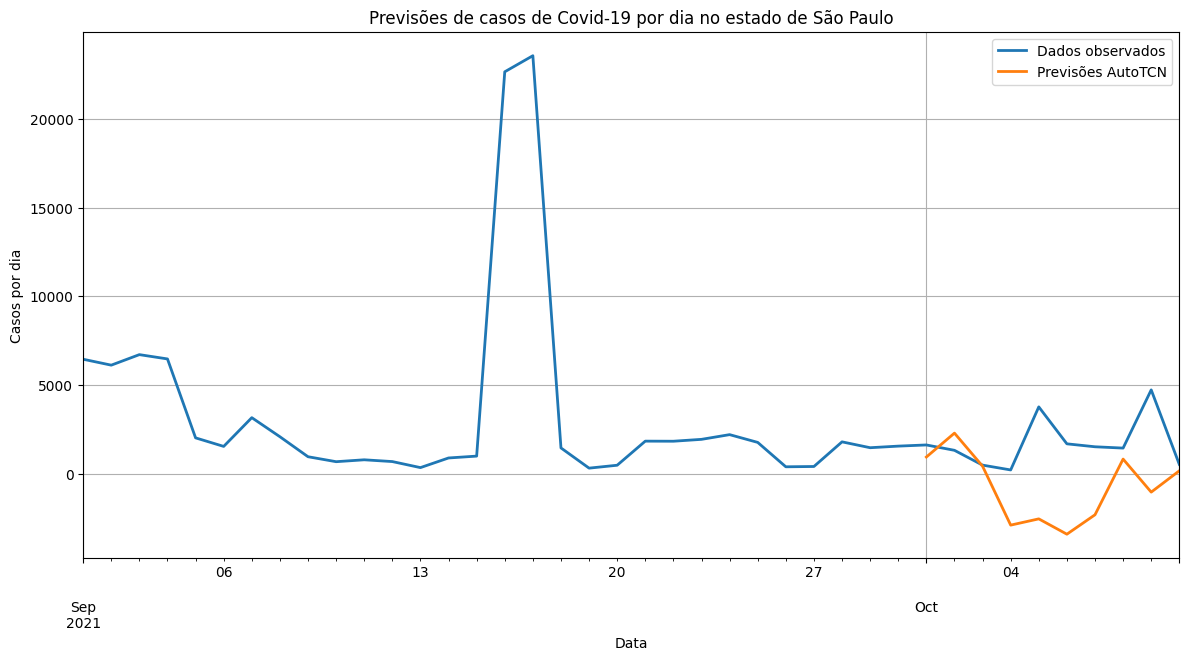

In [ ]:
import matplotlib.pyplot as plt
# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Assuming 'train' and 'p' are your dataframes
fig, ax = plt.subplots(figsize=(1280/96, 720/96))
fig.tight_layout(pad=7.0)

unique_id = 'Estado de SÃ£o Paulo'  # Set the specific ID you want to plot

plot_df = pd.concat([train.loc[train['unique_id'] == unique_id].tail(30),
                     p.loc[p['unique_id'] == unique_id]]).set_index('ds')  # Concatenate the train and forecast dataframes

# Plot the 'y' column with a custom label
plot_df['y'].plot(ax=ax, linewidth=2, label='Dados observados')

# Plot the 'AutoTCN' column with a custom label
plot_df['AutoTCN'].plot(ax=ax, linewidth=2, label='Previsões AutoTCN')

# Add legend
ax.legend()

ax.set_title(unique_id)
ax.grid()

# Renomear os eixos
ax.set_xlabel('Data')
ax.set_ylabel('Casos por dia')


# Definir título do gráfico
ax.set_title('Previsões de casos de Covid-19 por dia no estado de São Paulo')

plt.show()


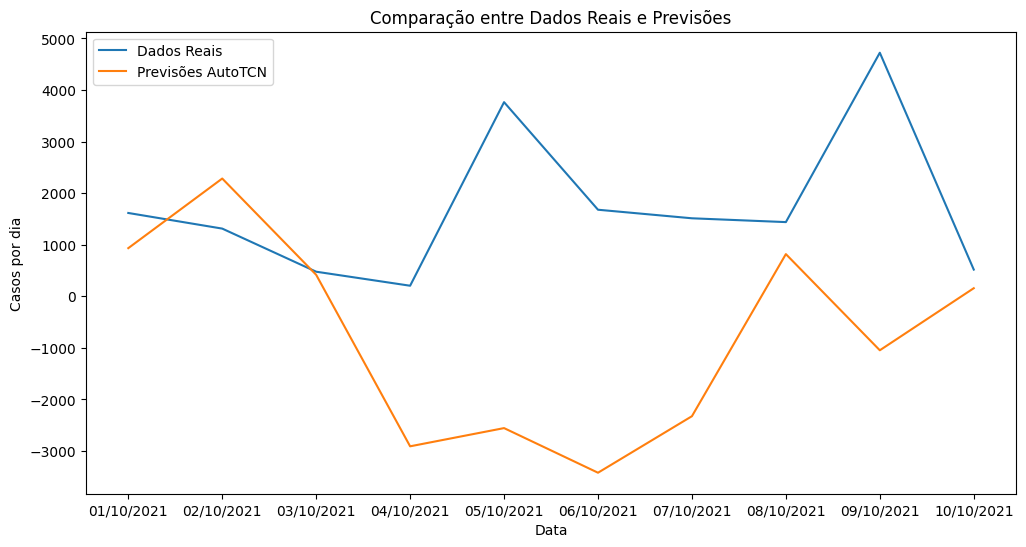

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Agora, você pode plotar o gráfico sem a linha voltar ao início
plt.figure(figsize=(12, 6))
plt.plot(p['ds'], p['y'], label='Dados Reais')
plt.plot(p['ds'], p['AutoTCN'], label='Previsões AutoTCN')
plt.title('Comparação entre Dados Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.legend()

# Formatar eixo x para exibir datas no formato 'dd/mm/yyyy'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(p['y'], p['AutoTCN'])
mse = mean_squared_error(p['y'], p['AutoTCN'])
rmse = mean_squared_error(p['y'], p['AutoTCN'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 2684.02919921875
MSE: 12563292.938161183
RMSE: 3544.4735770155185
